# Auswertung der Messdaten

Abdeckungsuntersuchung

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [2]:
Dunkel_offen_0 = pd.read_csv('../data/Messdaten/dunkel_offen/Attenuation_h=0deg_v=0deg_x=1000mm.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))
Dunkel_offen_60 = pd.read_csv('../data/Messdaten/dunkel_offen/Attenuation_h=60deg_v=0deg_x=1000mm.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))
Dunkel_zu_0 = pd.read_csv('../data/Messdaten/dunkel_zu/Attenuation_h=0deg_v=0deg_x=1000mm.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))
Dunkel_zu_60 = pd.read_csv('../data/Messdaten/dunkel_zu/Attenuation_h=60deg_v=0deg_x=1000mm.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))
Hell_offen_0 = pd.read_csv('../data/Messdaten/hell_offen/Attenuation_h=0deg_v=0deg_x=1000mm.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))
Hell_offen_60 = pd.read_csv('../data/Messdaten/hell_offen/Attenuation_h=60deg_v=0deg_x=1000mm.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))
Hell_zu_0 = pd.read_csv('../data/Messdaten/hell_zu/Attenuation_h=0deg_v=0deg_x=1000mm.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))
Hell_zu_60 = pd.read_csv('../data/Messdaten/hell_zu/Attenuation_h=60deg_v=0deg_x=1000mm.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))

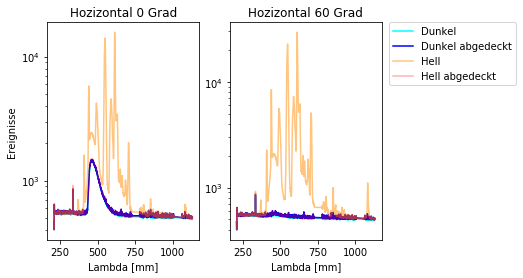

In [3]:
plt.subplot(1,2,1)
plt.plot(Dunkel_offen_0['Lambda'], Dunkel_offen_0['counts'], color='aqua')
plt.plot(Dunkel_zu_0['Lambda'], Dunkel_zu_0['counts'], color='blue')
plt.plot(Hell_offen_0['Lambda'], Hell_offen_0['counts'], color='darkorange', alpha=0.5)
plt.plot(Hell_zu_0['Lambda'], Hell_zu_0['counts'], color='red', alpha=0.3)
plt.yscale('log')
plt.xlabel('Lambda [mm]')
plt.ylabel('Ereignisse')
plt.title('Hozizontal 0 Grad')
plt.subplot(1,2,2)
plt.plot(Dunkel_offen_60['Lambda'], Dunkel_offen_60['counts'], color='aqua', label='Dunkel')
plt.plot(Dunkel_zu_60['Lambda'], Dunkel_zu_60['counts'], color='blue', label='Dunkel abgedeckt')
plt.plot(Hell_offen_60['Lambda'], Hell_offen_60['counts'], color='darkorange', alpha=0.5, label='Hell')
plt.plot(Hell_zu_60['Lambda'], Hell_zu_60['counts'], color='red',alpha=0.3, label='Hell abgedeckt')
plt.title('Hozizontal 60 Grad')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
plt.xlabel('Lambda [mm]')
plt.savefig('Untergrund_Untersuchung.pdf')

In [4]:
UG_Dunkel_zu_0 = pd.read_csv('../data/Messdaten/dunkel_zu/DarkCounts_h=0deg_v=0deg.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))
UG_Hell_zu_0 = pd.read_csv('../data/Messdaten/hell_zu/DarkCounts_h=0deg_v=0deg.txt', sep='\t', skiprows=1, names = ('Lambda','counts'))

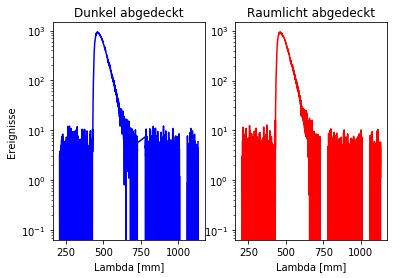

In [5]:
plt.subplot(1,2,1)
plt.plot(Dunkel_zu_0['Lambda'], Dunkel_zu_0['counts']-UG_Dunkel_zu_0['counts'], color='blue')
plt.yscale('log')
plt.xlabel('Lambda [mm]')
plt.ylabel('Ereignisse')
plt.title('Dunkel abgedeckt')
plt.subplot(1,2,2)
plt.plot(Hell_zu_0['Lambda'], Hell_zu_0['counts']-UG_Hell_zu_0['counts'], color='red')
plt.title('Raumlicht abgedeckt')
plt.yscale('log')
plt.xlabel('Lambda [mm]')
plt.savefig('DarkCounts.pdf')

Radialsymmetrie

In [6]:
#Einlesen der Radialdaten
radial_sig = list()
radial_ug = list()
for file in os.listdir('../data/Messdaten/radial'):
    if not file.startswith('.'):
        if file.startswith('Attenuation'):
            radial_sig.append(pd.read_csv("../data/Messdaten/radial/" + file, sep='\t', skiprows=1, names = ('Lambda','counts')))
            radial_sig[-1]['setup'] = file[12:-13]
for file in os.listdir('../data/Messdaten/radial'):
    if not file.startswith('.'):
        if file.startswith('DarkCounts'):
            radial_ug.append(pd.read_csv("../data/Messdaten/radial/" + file, sep='\t', skiprows=1, names = ('Lambda','counts')))
            radial_ug[-1]['setup'] = file[11:-4]    

In [7]:
#Darkcounts rausrechnen
for i in np.arange(0,len(radial_sig)):
    for j in np.arange(0,len(radial_ug)):
        if radial_sig[i]['setup'][0] == radial_ug[j]['setup'][0]:
            radial_sig[i]['UG_frei'] = radial_sig[i]['counts'] -radial_ug[j]['counts']
            break
radial_sig[149].head() 

,Lambda,counts,setup,UG_frei
0,208.295,476.2,h=5deg_v=65deg,2.4
1,208.670,439.4,h=5deg_v=65deg,-0.3
2,209.045,399.9,h=5deg_v=65deg,-4.6
3,209.419,409.0,h=5deg_v=65deg,-1.9
4,209.794,582.8,h=5deg_v=65deg,3.2


In [8]:
#Keine Wellenlängenauflösung -> Addition der counts für eine Winkelrichtung
sum_counts = list()
sum_setup = list()
for i in np.arange(0,len(radial_sig)):
    sum_setup.append(radial_sig[i]['setup'][0])
    sum_counts.append(np.sum(radial_sig[i]['UG_frei']))
sum_setup[2]

'h=-5deg_v=10deg'

In [9]:
sum_setup[2][-6] == '='

True

In [10]:
#Vertikale und horizontale Winkel aus dem Setup in entsprechende Listen schreiben
#Im Prinzip habe ich durch ausprobieren aller Möglichkeiten die Positionen der Zahlen gesucht und dann angehängt
#(also mit minus oder ohne, ein oder zweistellig)
#durch die Ausgabe der Längen wird überprüft, ob alle Fälle mitgenommen wurden

sum_hor = list()
sum_vert = list()

for i in np.arange(0, len(sum_setup)):
    #Horizontal
    h = 0
    if sum_setup[i][2]=='-': #Mit Minus
        if sum_setup[i][4] == 'd':
            h = '-' + sum_setup[i][3] #Einstellig
        else:
            h = '-' + sum_setup[i][3] + sum_setup[i][4] #Zweistellig
    else: #Positiv
        if sum_setup[i][3] == 'd': #Einstellig
            h = sum_setup[i][2]
        else:
            h = sum_setup[i][2] + sum_setup[i][3] #zweistellig
     
    #Vertikal
    v = 0
    if sum_setup[i][-5] == '-':
        v = '-' + sum_setup[i][-4] #einstellig minus 
    elif sum_setup[i][-5] == '=':
        v = sum_setup[i][-4] #einstellig positiv
    elif sum_setup[i][-6] == '-':
        v ='-' + sum_setup[i][-5] + sum_setup[i][-4] #zweistellig negativ
    elif sum_setup[i][-6] == '=':
        v = sum_setup[i][-5] + sum_setup[i][-4] #zweistellig positiv
        
    sum_hor.append(float(h))
    sum_vert.append(float(v))
print(len(sum_vert)) #=150 wenn korrekt
len(sum_hor) #=150 wenn korrekt

150


150

Ich bin mir nicht ganz sicher, wie wir die Radialsymmetrie zeigen sollen... Ich habe jetzt mal eine 3D-Plot mit beiden Winkeln drin und die 2D-Plot mit Counts gegen je einen Winkel <br>
So richtig symmetrisch finde ich das iwie auch nicht... vllt hätten wir mehr in den Minus-Bereich messen müssen, um die Symmetrie um Null zu sehen?

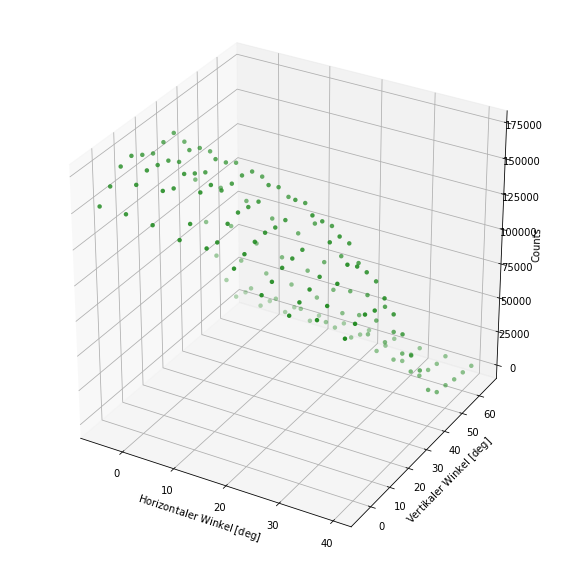

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure (figsize=(8,8))
ax = fig.add_subplot (111, projection='3d')

ax.scatter(
    sum_hor, sum_vert, sum_counts,
    lw=0, # no lines around points
    #s=10, # smaller points
    color = 'forestgreen'
 )
ax.set_xlabel(r'Horizontaler Winkel$\;$[deg]')
ax.set_ylabel(r'Vertikaler Winkel$\;$[deg]')
ax.set_zlabel(r'Counts')
plt.tight_layout()

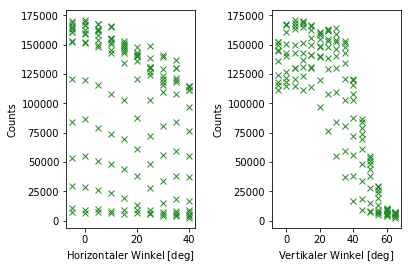

In [12]:
plt.subplot(1,2,1)
plt.plot(sum_hor, sum_counts, color = 'forestgreen', marker = 'x', linestyle = '')
plt.xlabel(r'Horizontaler Winkel$\;$[deg]')
plt.ylabel(r'Counts')

plt.subplot(1,2,2)
plt.plot(sum_vert, sum_counts, color = 'forestgreen', marker = 'x', linestyle = '')
plt.xlabel(r'Vertikaler Winkel$\;$[deg]')
plt.ylabel(r'Counts')

plt.subplots_adjust(wspace = 0.6)

Winkelabhängige Abschwächung

In [13]:
#Einlesen
int_sig = list()
int_ug = list()
for file in os.listdir('../data/Messdaten/intensitaet_abstand'):
    if not file.startswith('.'):
        if file.startswith('Attenuation'):
            int_sig.append(pd.read_csv("../data/Messdaten/intensitaet_abstand/" + file, sep='\t', skiprows=1, names = ('Lambda','counts')))
            int_sig[-1]['setup'] = file[12:-4]
for file in os.listdir('../data/Messdaten/intensitaet_abstand'):
    if not file.startswith('.'):
        if file.startswith('DarkCounts'):
            int_ug.append(pd.read_csv("../data/Messdaten/intensitaet_abstand/" + file, sep='\t', skiprows=1, names = ('Lambda','counts')))
            int_ug[-1]['setup'] = file[11:-4]   

In [14]:
int_sig[5]['setup'][0][0:-8]

'h=-10deg_v=0deg'

In [15]:
#Darkcounts abziehen
#Darkcounts wurden nur einmal pro Winkel aufgenommen, also nicht für jedes x extra 
#-> Deshalb nicht alles vom setup vergleichen (aufteilung in x = 0 und x = 100, 200 usw.)
for i in np.arange(0,len(int_sig)):
    for j in np.arange(0,len(int_ug)):
        if int_sig[i]['setup'][0][0:-6] == int_ug[j]['setup'][0]:
            int_sig[i]['UG_frei'] = int_sig[i]['counts'] -int_ug[j]['counts']
            break
        elif int_sig[i]['setup'][0][0:-8] == int_ug[j]['setup'][0]:
            int_sig[i]['UG_frei'] = int_sig[i]['counts'] -int_ug[j]['counts']
            break

In [16]:
#Abstand als Zahl ins Datenframe zufügen
for i in np.arange(0,len(int_sig)):
    if int_sig[i]['setup'][i][-6] == '=': #dann ist es eine hunderter-Zahl
        int_sig[i]['x'] = float(int_sig[i]['setup'][i][-5] + '0'+'0')
    else:
        int_sig[i]['x'] = 0.0

In [17]:
#Horizontalen Winkel als Zahl einfügen
#wieder Aufteilung in Plus/Minus und ein/zweistellig
for i in np.arange(0,len(int_sig)):
    if int_sig[i]['setup'][0][2]=='-':
        if int_sig[i]['setup'][0][4] == 'd':
            int_sig[i]['hor'] = '-' + int_sig[i]['setup'][0][3]
        else:
            int_sig[i]['hor'] = '-' + int_sig[i]['setup'][0][3] + int_sig[i]['setup'][0][4]
    else:
        if int_sig[i]['setup'][0][3] == 'd':
            int_sig[i]['hor'] = int_sig[i]['setup'][0][2]
        else:
            int_sig[i]['hor'] = int_sig[i]['setup'][0][2] + int_sig[i]['setup'][0][3]

In [18]:
int_sig[0].head()

,Lambda,counts,setup,UG_frei,x,hor
0,208.295,471.4,h=-10deg_v=0deg_x=0mm,0.3,0.0,-10
1,208.670,441.4,h=-10deg_v=0deg_x=0mm,1.9,0.0,-10
2,209.045,403.4,h=-10deg_v=0deg_x=0mm,-0.2,0.0,-10
3,209.419,407.1,h=-10deg_v=0deg_x=0mm,0.8,0.0,-10
4,209.794,596.4,h=-10deg_v=0deg_x=0mm,4.6,0.0,-10


Text(0, 0.5, 'Ereignisse')

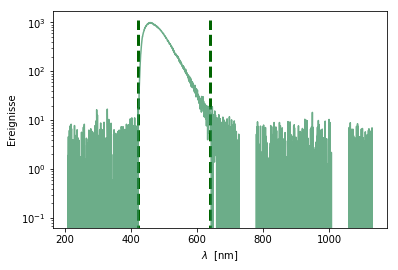

In [19]:
#Peakgrenzen für x=0, hor=-10
#Ich benutze die später für alle, müsste ja eig passen?!

plt.plot(int_sig[0]['Lambda'], int_sig[0]['UG_frei'], color = 'seagreen', alpha=0.7)
plt.vlines(420, -100, 1100,linestyle='--', color = 'darkgreen', linewidth=3.0)
plt.vlines(640, -100, 1100, linestyle='--', color = 'darkgreen', linewidth=3.0)
plt.yscale('log')
plt.xlabel('$\lambda\;$ [nm]')
plt.ylabel('Ereignisse')


In [20]:
#Datenframe auf Peak zuschneiden
int_sig_peak = list()
for i in np.arange(0, len(int_sig)):
    temp = int_sig[i][int_sig[i]['Lambda']>420] #Zweischrittig oben und untere Grenze (bin zu blöd für beide gleichzeitig...)
    int_sig_peak.append(temp[temp['Lambda']<640])
    
print(len(int_sig_peak)==len(int_sig))
print(int_sig_peak[0].head())

True
      Lambda  counts                  setup  UG_frei    x  hor
542  420.345   596.8  h=-10deg_v=0deg_x=0mm      5.2  0.0  -10
543  420.752   584.7  h=-10deg_v=0deg_x=0mm      6.6  0.0  -10
544  421.160   610.9  h=-10deg_v=0deg_x=0mm     17.4  0.0  -10
545  421.546   590.0  h=-10deg_v=0deg_x=0mm      0.2  0.0  -10
546  421.953   606.1  h=-10deg_v=0deg_x=0mm     13.0  0.0  -10


In [21]:
#Fitfunktion
def fit_exp(x,a,b):
    return a*np.exp(-b*x)

In [22]:
lamda = int_sig_peak[0]['Lambda'] #sind überall gleich...
winkel = np.array([-10, -20, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

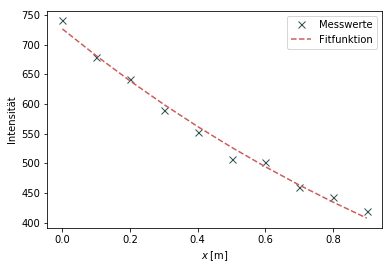

In [23]:
#Beispielplot fürs Protokoll für Fit:
#Beispiel anhand der 50. Wellenlänge und hor = -10°(Zufällige Wahl..)
#x wird in m umgerechnet 

x = list()
I = list()

for i in np.arange(0, 10):
    x.append(int_sig_peak[i]['x'].values[0]*(1/1000))
    I.append(int_sig_peak[i]['UG_frei'].values[50])
        
    
params, cov = curve_fit(fit_exp, np.array(x), np.array(I))
error = np.sqrt(np.diag(cov))

y = list()
for i in range(len(x)):
    y.append(fit_exp(x[i], *params))

plt.plot(x,I, color = 'darkslategrey', marker = 'x', linestyle='', label = 'Messwerte', markersize = 7)
plt.plot(x, y, color = 'indianred', linestyle = '--', label = 'Fitfunktion')

plt.xlabel(r'$x\;$[m]')
plt.ylabel(r'Intensität')
plt.legend()

In [24]:
#Jetzt Fit für alle Wellenlängen und Winkel

fit_exp_a = list() 
fit_exp_b = list()
fit_exp_a_err = list() 
fit_exp_b_err = list()
# enthalten Liste für jede Wellenlänge, welche Liste mit Winkelabhängigen Parametern enthält
# fit_exp [Wellenlänge][Winkel]

for j in np.arange(0,len(int_sig_peak[0])): #Wellenlängen
    #Extra Listen um Wellenlängenabhängigkeit für später zu behalten
    # (also hier sind Fitwerte für eine Wellenlänge für alle Winkel drin)
    fit_exp_lam_a = list()
    fit_exp_lam_b = list()
    fit_exp_lam_a_err = list()
    fit_exp_lam_b_err = list()
    
    for i in np.arange(0, len(int_sig_peak)): #Winkel
        if i % 10 == 0: #Datensatz ist sortiert -> Immer wenn alle x für einen Winkel durch: Neue Listen erstellen
            x = list()
            I = list()
            
        x.append(int_sig_peak[i]['x'].values[0]*(1/1000))
        I.append(int_sig_peak[i]['counts'].values[j])
        
        if (i+1) % 10 == 0: # bei letztem x fitten
            params, cov = curve_fit(fit_exp, np.array(x), np.array(I) )
            error = np.sqrt(np.diag(cov))
            fit_exp_lam_a.append(params[0])
            fit_exp_lam_b.append(params[1])
            fit_exp_lam_a_err.append(error[0])
            fit_exp_lam_b_err.append(error[1])
     
    #wenn alle Winkel durch, anhängen der Wellenlänge an große Liste
    fit_exp_a.append(fit_exp_lam_a)
    fit_exp_b.append(fit_exp_lam_b)
    fit_exp_a_err.append(fit_exp_lam_a_err)
    fit_exp_b_err.append(fit_exp_lam_b_err)
            
                        

In [25]:
fit_exp_b[0]

[0.0008000169746168499,
 0.009787436011137919,
 0.00784369267936582,
 -0.001677696550626674,
 0.010147712306696418,
 -0.004400771530014385,
 0.0009263244085011635,
 0.0007490514895794886,
 0.007597497683024213,
 -0.004302920148912777,
 -0.0037082402641414893,
 0.0034046581083061393]

Abschwächung in Abhängigkeit vom Winkel -> Mitteln über alle Wellenlängen

In [26]:
#Mitteln über Wellenlängen
#Den Fehler mittel ich im Moment auch und ignoriere den Fehler auf Mittelwert (müsste man den dazu addieren?)
b_mean = list()
b_mean_err = list()

#Abschwächung
for i in range(len(winkel)):
    sum = 0
    for j in range(len(fit_exp_b)):
        sum = sum + fit_exp_b[j][i]
    b_mean.append(sum/len(fit_exp_b))

#Fehler der Abschwächung
for i in range(len(winkel)):
    sum = 0
    for j in range(len(fit_exp_b)):
        sum = sum + fit_exp_b_err[j][i]
    b_mean_err.append(sum/len(fit_exp_b_err))
    
b_mean
b_mean_err

[0.007738142993817043,
 0.007815239178998925,
 0.007789868309121064,
 0.00788244385123794,
 0.0077386866457587866,
 0.007617103224519534,
 0.007876387147096651,
 0.00657819072876104,
 0.005712712561271822,
 0.005712060430686828,
 0.005725765955840184,
 0.00572528815623499]

Text(0, 0.5, 'Abschwächung$\\;$[m$^{-1}$]')

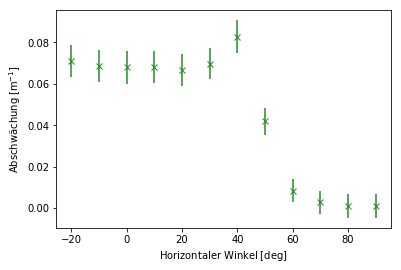

In [27]:
#Plot der Abschwächung gegen Winkel
#plt.plot(winkel, b_mean, color = 'forestgreen', linestyle = '', marker = 'x')

#Fehler aus Regression (Mittelwertfehler ist nicht mit drin)
plt.errorbar(winkel, b_mean, yerr=b_mean_err, fmt='x', color = 'forestgreen')
plt.xlabel(r'Horizontaler Winkel$\;$[deg]')
plt.ylabel(r'Abschwächung$\;$[m$^{-1}$]')

In [28]:
#Mitteln von I_0 über Wellenlängen
a_mean = list()
a_mean_err = list()

#Abschwächung
for i in range(len(winkel)):
    sum = 0
    for j in range(len(fit_exp_a)):
        sum = sum + fit_exp_a[j][i]
    a_mean.append(sum/len(fit_exp_a))

#Fehler der Abschwächung
for i in range(len(winkel)):
    sum = 0
    for j in range(len(fit_exp_a)):
        sum = sum + fit_exp_a_err[j][i]
    a_mean_err.append(sum/len(fit_exp_a_err))

a_mean_err

[3.5681120361987197,
 3.539485342692402,
 3.670504558646021,
 3.6349544330601122,
 3.535355570730189,
 3.314159611543731,
 3.4574524795095187,
 2.301833274788565,
 1.7892006353603869,
 1.7639056342499762,
 1.7633045213619831,
 1.7639298047745648]

Text(0, 0.5, '$I_0$')

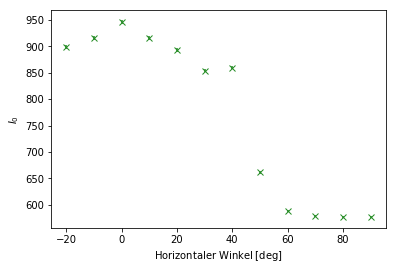

In [29]:
#Plot von I_0
plt.errorbar(winkel, a_mean, yerr=a_mean_err, fmt='x', color = 'forestgreen')
plt.xlabel(r'Horizontaler Winkel$\;$[deg]')
plt.ylabel(r'$I_0$')

Fit von Abschwächung

In [30]:
#nur für Kernphotonen 
# Aus Simulation: Grenzwinkel ist bei 15 (aus letzten Plot)
#-> per Hand ausgewählt, würde auch mit Maske gehen, aber ich weiß nicht, wie ich das dann auf andere Daten anwenden soll...
winkel_core = np.array([winkel[0], winkel[2], winkel[3]])
print(winkel_core)

theta = np.arcsin( np.sin(winkel_core/360*2*np.pi)* (3.882/1.6)) 
#in rad

#In Faser keine plus/minus Winkel
theta = np.abs(theta)
print('In Grad: ',theta*360/2/np.pi)
print('In rad: ',theta)

[-10   0  10]
In Grad:  [24.91756675  0.         24.91756675]
In rad:  [0.43489358 0.         0.43489358]


In [31]:
#r_min aus Simulation (in m)
#(aus Mittelwerte der r_min Plot abgelesen)
#Ich mittel jetzt die beiden, sonst wäre das ja auch ein freier Parameter und ich weiß nicht, wie man mit zwei fittet

r_min_all = np.array([0.00007633704280124122, 0.0000452164576643557, 0.00007633704280124122])
r_min = np.mean(r_min_all)
print(r_min)

r_kern = 0.000110

wurzel = np.sqrt(r_kern**2 - r_min**2)
wurzel

6.596351442227938e-05


8.802735236880489e-05

In [32]:
#Fitfunktion
def a_eff (thet, a_0, eps):
    return (a_0/np.cos(thet)) + ( (eps * np.tan(thet)) / 2*wurzel )

Text(0, 0.5, 'Abschwächung$\\;$[m$^{-1}$]')

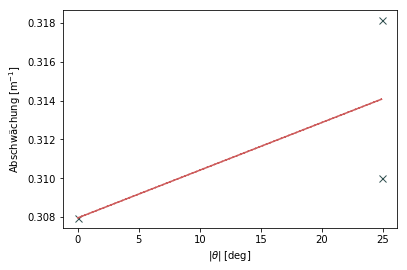

In [33]:
#Beispielplot für Fit (wieder für 50)

#Kernphotonbereich wählen
b_relevant = np.array([fit_exp_b[50][0], fit_exp_b[50][2], fit_exp_b[50][3]])
    
params, cov = curve_fit(a_eff, theta, b_relevant )

y = list()
for i in range(len(theta)):
    y.append(a_eff(theta[i], *params))

plt.plot(theta*(360/2/np.pi), b_relevant, color = 'darkslategrey', marker = 'x', linestyle='', label = 'Messwerte', markersize = 7)
plt.plot(theta*(360/2/np.pi), np.array(y),  color = 'indianred', linestyle = '--', label = 'Fitfunktion')

plt.xlabel(r'$|\theta|\;$[deg]')
plt.ylabel(r'Abschwächung$\;$[m$^{-1}$]')

In [34]:
#Fit für alle Wellenlängen
epsilon = list()
epsilon_err = list()
a0 = list()
a0_err = list()

for i in range(len(fit_exp_b)):
    b_relevant = np.array([fit_exp_b[i][0], fit_exp_b[i][2], fit_exp_b[i][3]])
    
    params, cov = curve_fit(a_eff, theta, b_relevant )
    error = np.sqrt(np.diag(cov))
    
    epsilon.append(params[1])
    epsilon_err.append(error[1])
    a0.append(params[0])
    a0_err.append(error[0])
    


Text(0, 0.5, '$\\epsilon$')

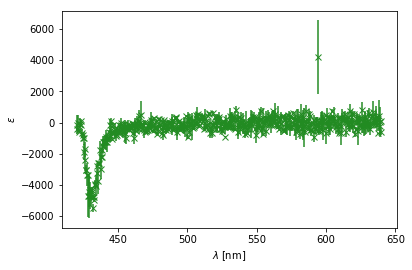

In [35]:
#Plot der epsilon (wellenlängenabhängig)
plt.errorbar(int_sig_peak[0]['Lambda'], epsilon, yerr=epsilon_err, fmt='x', color = 'forestgreen')
plt.xlabel(r'$\lambda\;$[nm]')
plt.ylabel(r'$\epsilon$')

Text(0, 0.5, '$a_0$')

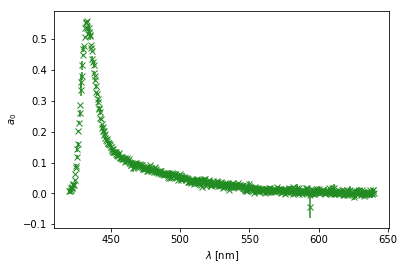

In [36]:
#Plot von a_0
plt.errorbar(int_sig_peak[0]['Lambda'], a0, yerr=a0_err, fmt='x', color = 'forestgreen')
plt.xlabel(r'$\lambda\;$[nm]')
plt.ylabel(r'$a_0$')

Wellenlängenabhängigen Reflektionskoeffizienten = epsilon (blöde Bezeichnung in der Anleitung, steht kurz über der A_refl Formel) <br>
-> also Plot oben <br>
leider nicht gerade exponentiell abfallend, deshalb versuche ich das gar nicht erst zu fitten (Punkt 8)

Winkelabhängiges Epsilon

In [37]:
theta = np.arcsin( np.sin(winkel/360*2*np.pi)* (3.882/1.6))
print(theta)

#Wähle die theta, die nicht nan ausspucken und schneide Rest darauf zu
theta_moegl = np.abs(theta[0:5])
b_mean_moegl = b_mean[0:5]

#Hier nehme ich den Mittelwert von a_0, das ist mir als einziges eingefallen, sonst passt das von den Dimensionen nicht
#(a_0 ist wellenlängenabhängig und das ist hier nicht mehr gefragt)
#Fehler wird wieder nur gemittelt und nicht Mittelwertfehler mit beachtet
a0_mean = np.mean(a0)
a0_mean
a0_mean_err = np.mean(a0_err)

[-0.43489358 -0.97879646  0.          0.43489358  0.97879646         nan
         nan         nan         nan         nan         nan         nan]


/home/miriam/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.


In [38]:
#Berechnung von Epsilon (aus Umstellung von Formel 9)
#Fehler durch Fehlerfortpflanzung von a_0 und a_eff

epsilon_winkel = (b_mean_moegl-(a0_mean/np.cos(theta_moegl))) * (2*wurzel/np.tan(theta_moegl))
Delta_epsilon = np.sqrt( ((2*wurzel)/np.tan(theta_moegl))**2 * (np.array(b_mean_err[0:5])**2) + (a0_mean_err/np.cos(theta_moegl)**2) )

print(Delta_epsilon)
print(epsilon_winkel)

#Für null Grad kommt unendlich raus, weil durch Null geteilt wird

[0.07276764 0.11826433        inf 0.07276764 0.11826433]
[-2.42485702e-06 -6.00498525e-06             inf -2.57013338e-06
 -6.49032800e-06]


/home/miriam/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


/home/miriam/.local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3199: RuntimeWarning: invalid value encountered in double_scalars
  low = [thisx - thiserr for thisx, thiserr


Text(0, 0.5, '$\\epsilon\\;$[m$^{-1}$]')

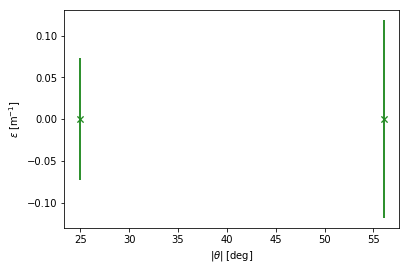

In [39]:
#Plot der Winkelabhängigen epsilon

#plt.plot(theta_moegl, epsilon_winkel, linestyle = '', marker = 'x', color = 'forestgreen')
plt.errorbar(theta_moegl*(360/2/np.pi), epsilon_winkel, yerr=Delta_epsilon, fmt='x', color = 'forestgreen')
plt.xlabel(r'$|\theta|\;$[deg]')
plt.ylabel(r'$\epsilon\;$[m$^{-1}$]')

#Sind eig vier Werte, aber liegen übereinander...
